In [7]:
from schemdraw.parsing import logicparse
from ipynb.fs.full.type_formule import typecheck_formule
from ipynb.fs.full.printer import formule_priority, StringFormuleError
from ipynb.fs.full.syntax_formule import analyse_prop
import sys

ImportError: Could not import /home/sam/DATA/git/pyticoq/src/printer.ipynb for ipynb.fs.full.printer: incorrect version or language

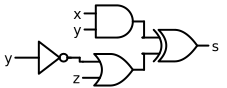

In [3]:
# Test

#https://schemdraw.readthedocs.io/en/latest/elements/logic.html

#logicparse('(x and y) xor (not y or z))', outlabel='s').draw()

In [4]:

#https://schemdraw.readthedocs.io/en/latest/elements/logic.html
def string_of_formule2(tformule):
    """
    
    """
    typecheck_formule(tformule)

    priority = formule_priority(tformule)
    
    tag, val = tformule
    
    if tag == 'Vrai':
        return 'True'

    if tag == 'Faux':
        return 'False'

    if tag == 'Var':
        return val
        
    if tag == 'Non':
        return 'not ' + parent_string_of_formule2(val, priority, False)
    
    try :
        val1, val2 = val
    except TypeError as err:
        raise StringFormuleError(tformule) from err

    sv1 = parent_string_of_formule2(val1, priority, True)
    sv2 = parent_string_of_formule2(val2, priority, False)
    
    if tag == 'Et':
        return  sv1 + ' and ' + sv2

    if tag == 'Ou':
        return sv1 + ' or ' + sv2

    if tag == 'Implique':
        return 'not ' + sv1 + ' or ' + sv2

    if tag == 'Equivalent':
        return '(not ' + sv1 + ' or ' + sv2 +\
            ') and (not ' + sv2 + ' or ' + sv1 + ')'
    
    raise StringFormuleError(tformule)


def parent_string_of_formule2(formule, priority, assoc):
    """
    En fonction de la priorité de la sous-formule formule par rapport à la formule parente
    et de l'associativité à gauche la formule est écrite avec ou sans parenthèses.
    """
    typecheck_formule(formule)

    if formule_priority(formule) < priority or (formule_priority(formule) == priority and assoc):
        return '(' + string_of_formule2(formule) + ')'
    return string_of_formule2(formule)

In [5]:
def draw(strform):
    f = analyse_prop(strform)
    s = string_of_formule2(f)
    #print(s)
    logicparse(s).draw()

In [ ]:
if __name__ == "__main__":
    if len(sys.argv) < 2:
        print("Donner une formule en argument")
    else:
        draw(sys.argv[1])